## Consulta de Temperaturas INteractivo por Ciudad y Mes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

1. Cragar un dataframe con los datos meteorologicos

In [3]:
df = pd.read_csv('/home/anderson-josue/Documents/Data Science/Day 9/Datos+Meteorológicos_Arg_2023.csv')

df.info()
df.describe()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9


2. Formatear las fechas 

In [19]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Meses'] = df['Fecha'].dt.month
mes = pd.Series(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
df['Meses'] = df['Meses'].apply(lambda x: mes[x - 1])
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa,Meses
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8,Enero
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7,Enero
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0,Enero
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8,Enero
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9,Enero


3. Funcion o funciones que pida al usuario una ciduda, mes de la lista de ciudades disponibles

In [83]:
def mostra_ciudades():
    ciudades = df['Ciudad'].unique()
    i = 0
    print('Ciudades disponibles: ')
    print('Eliga el nombre de la ciudad: ')
    for ciudad in ciudades:
        i += 1
        print(f'{i}.- {ciudad}')

def elegir_ciudad():
    ciudad = input('Ingrese el nombre de la ciudad: ').title()
    try:
        if ciudad in df['Ciudad'].values:
            return ciudad
        else:
            print('Ciudad no encontrada')
    except Exception as e:
        print(f'Error: {e}')

def mostrar_fecha():
    fecha =df['Meses'].unique()
    i = 0
    print('Fechas Disponibles: ')
    print('Eliga la fecha: ')
    for f in fecha:
        i+=1
        print(f'{i}.- {f}')

def elegir_fecha():
    fecha = input('Ingrese el nombre del mes" ').title()
    try:
        if fecha in df['Meses'].values:
            return fecha
        else:
            print('Fecha no encontrada')
    except Exception as e:
        print(f'Error: {e}')

In [ ]:
def ciudad_fecha_dataframe(ciudad, fecha):
    df_ciudad = df[df['Ciudad'] == ciudad]
    df_mes = df_ciudad[df_ciudad['Meses'] == fecha]
    return df_mes


In [46]:
temperatura = ciudad_fecha_dataframe(elegir_ciudad(), elegir_fecha())
temperatura.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa,Meses
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8,Enero
8,2023-01-02,Mendoza,34,19,0.0,39.7,36.1,Enero
13,2023-01-03,Mendoza,29,19,0.0,11.9,71.5,Enero
18,2023-01-04,Mendoza,33,15,53.7,31.0,47.8,Enero
23,2023-01-05,Mendoza,21,17,0.0,23.1,83.5,Enero


4. Muestra en un grafico, Tempreatura minimas y maximas que se registraron en la ciudad elegida y el mes elegido

In [88]:
def plot_temperature(df):
    plt.fill_between(df['Fecha'], df['Temperatura Maxima'], color='red', alpha=0.5)
    plt.fill_between(df['Fecha'], df['Temperatura Minima'], color='blue', alpha=0.9)
    plt.xticks(rotation=90)
    plt.title(df['Ciudad'].values[0])
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura')

5. Dese seguir consultado 

In [89]:
def main():
    mostra_ciudades()
    mostrar_fecha()
    while True:    
        ciudad = elegir_ciudad()
        fecha = elegir_fecha()
        plot_temperature(ciudad_fecha_dataframe(ciudad, fecha))
        plt.show()

        consulta = input('Desea seguir con el programa? (S/N): ')
        if consulta.lower() != 's':
            break

Ciudades disponibles: 
Eliga el nombre de la ciudad: 
1.- Buenos Aires
2.- Cordoba
3.- Rosario
4.- Mendoza
5.- Tucuman
Fechas Disponibles: 
Eliga la fecha: 
1.- Enero
2.- Febrero
3.- Marzo
4.- Abril
5.- Mayo
6.- Junio
7.- Julio
8.- Agosto
9.- Septiembre
10.- Octubre
11.- Noviembre
12.- Diciembre


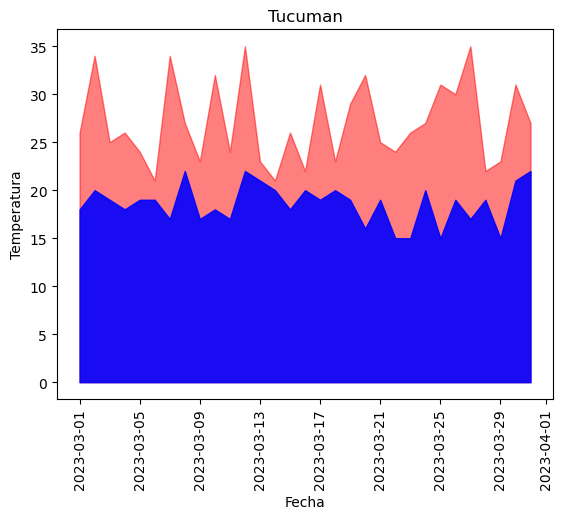

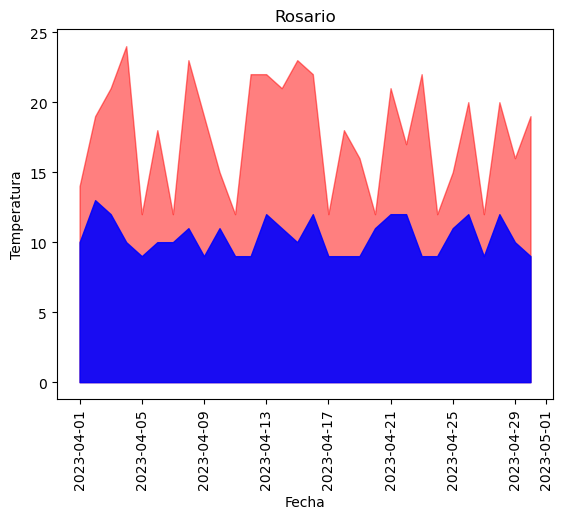

In [91]:
main()